# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [4]:
# Your code here. 
import pandas as pd
import numpy as np
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

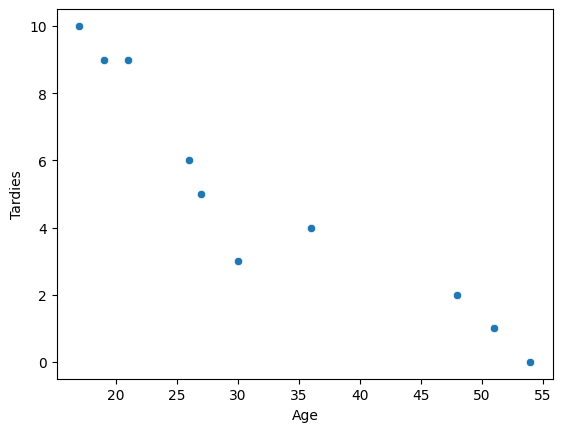

In [5]:
# Your code here.
import seaborn as sns

sns.scatterplot( x= student_data.Age, y=student_data.Tardies);

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [6]:
# Your response here. 

#Yes, there is a negative trend where the youger the student is , the most amount of times late they are.-

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [7]:
# Your response here.
np.cov(student_data.Age, student_data.Tardies)

array([[187.65555556, -45.56666667],
       [-45.56666667,  12.54444444]])

In [8]:
np.corrcoef(student_data.Age, student_data.Tardies)

array([[ 1.        , -0.93916269],
       [-0.93916269,  1.        ]])

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [9]:
# Your response here.
from sklearn.linear_model import LinearRegression

In [10]:
lr = LinearRegression()

In [12]:
lr.fit(
    X = student_data[['Age']],
    y = student_data.Tardies 
)

LinearRegression()

Plot your regression model on your scatter plot.

In [13]:
# Your code here.
lr.intercept_

12.888803363135771

In [14]:
lr.coef_[0]

-0.2428207709159809

In [15]:
def prediction_through_sickitlearn (x):
    m =  lr.coef_[0]
    n = lr.intercept_
     
    return m * x + n

In [16]:
student_data["prediction"] = student_data.Age.apply(prediction_through_sickitlearn)

In [17]:
student_data

,Age,Tardies,prediction
0,17,10,8.760850
1,51,1,0.504944
2,27,5,6.332643
3,21,9,7.789567
4,36,4,4.147256
5,48,2,1.233406
6,19,9,8.275209
7,26,6,6.575463
8,54,0,-0.223518
9,30,3,5.604180


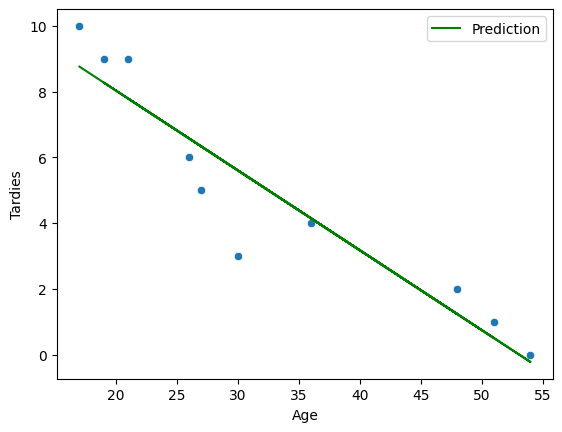

In [19]:
from matplotlib import pyplot as plt

sns.scatterplot(x=student_data.Age, y=student_data.Tardies)
plt.plot(student_data.Age, student_data.prediction, label="Prediction", c="g")
plt.legend();

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
# Your response here. 

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [42]:
# Import any libraries you may need & the data
from sklearn import metrics

data = pd.read_csv('vehicles.csv')
data

,Make,Model,Year,Engine_Displacement,Cylinders,Transmission,Drivetrain,Vehicle_Class,Fuel_Type,Fuel_Barrels_Year,City_MPG,Highway_MPG,Combined_MPG,CO2_Emission_Grams_Mile,Fuel_Cost_Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,1.0,3,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35948,smart,fortwo coupe,2014,1.0,3,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.000000,1100
35949,smart,fortwo coupe,2015,1.0,3,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35950,smart,fortwo coupe,2016,0.9,3,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,39,36,246.000000,1100


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

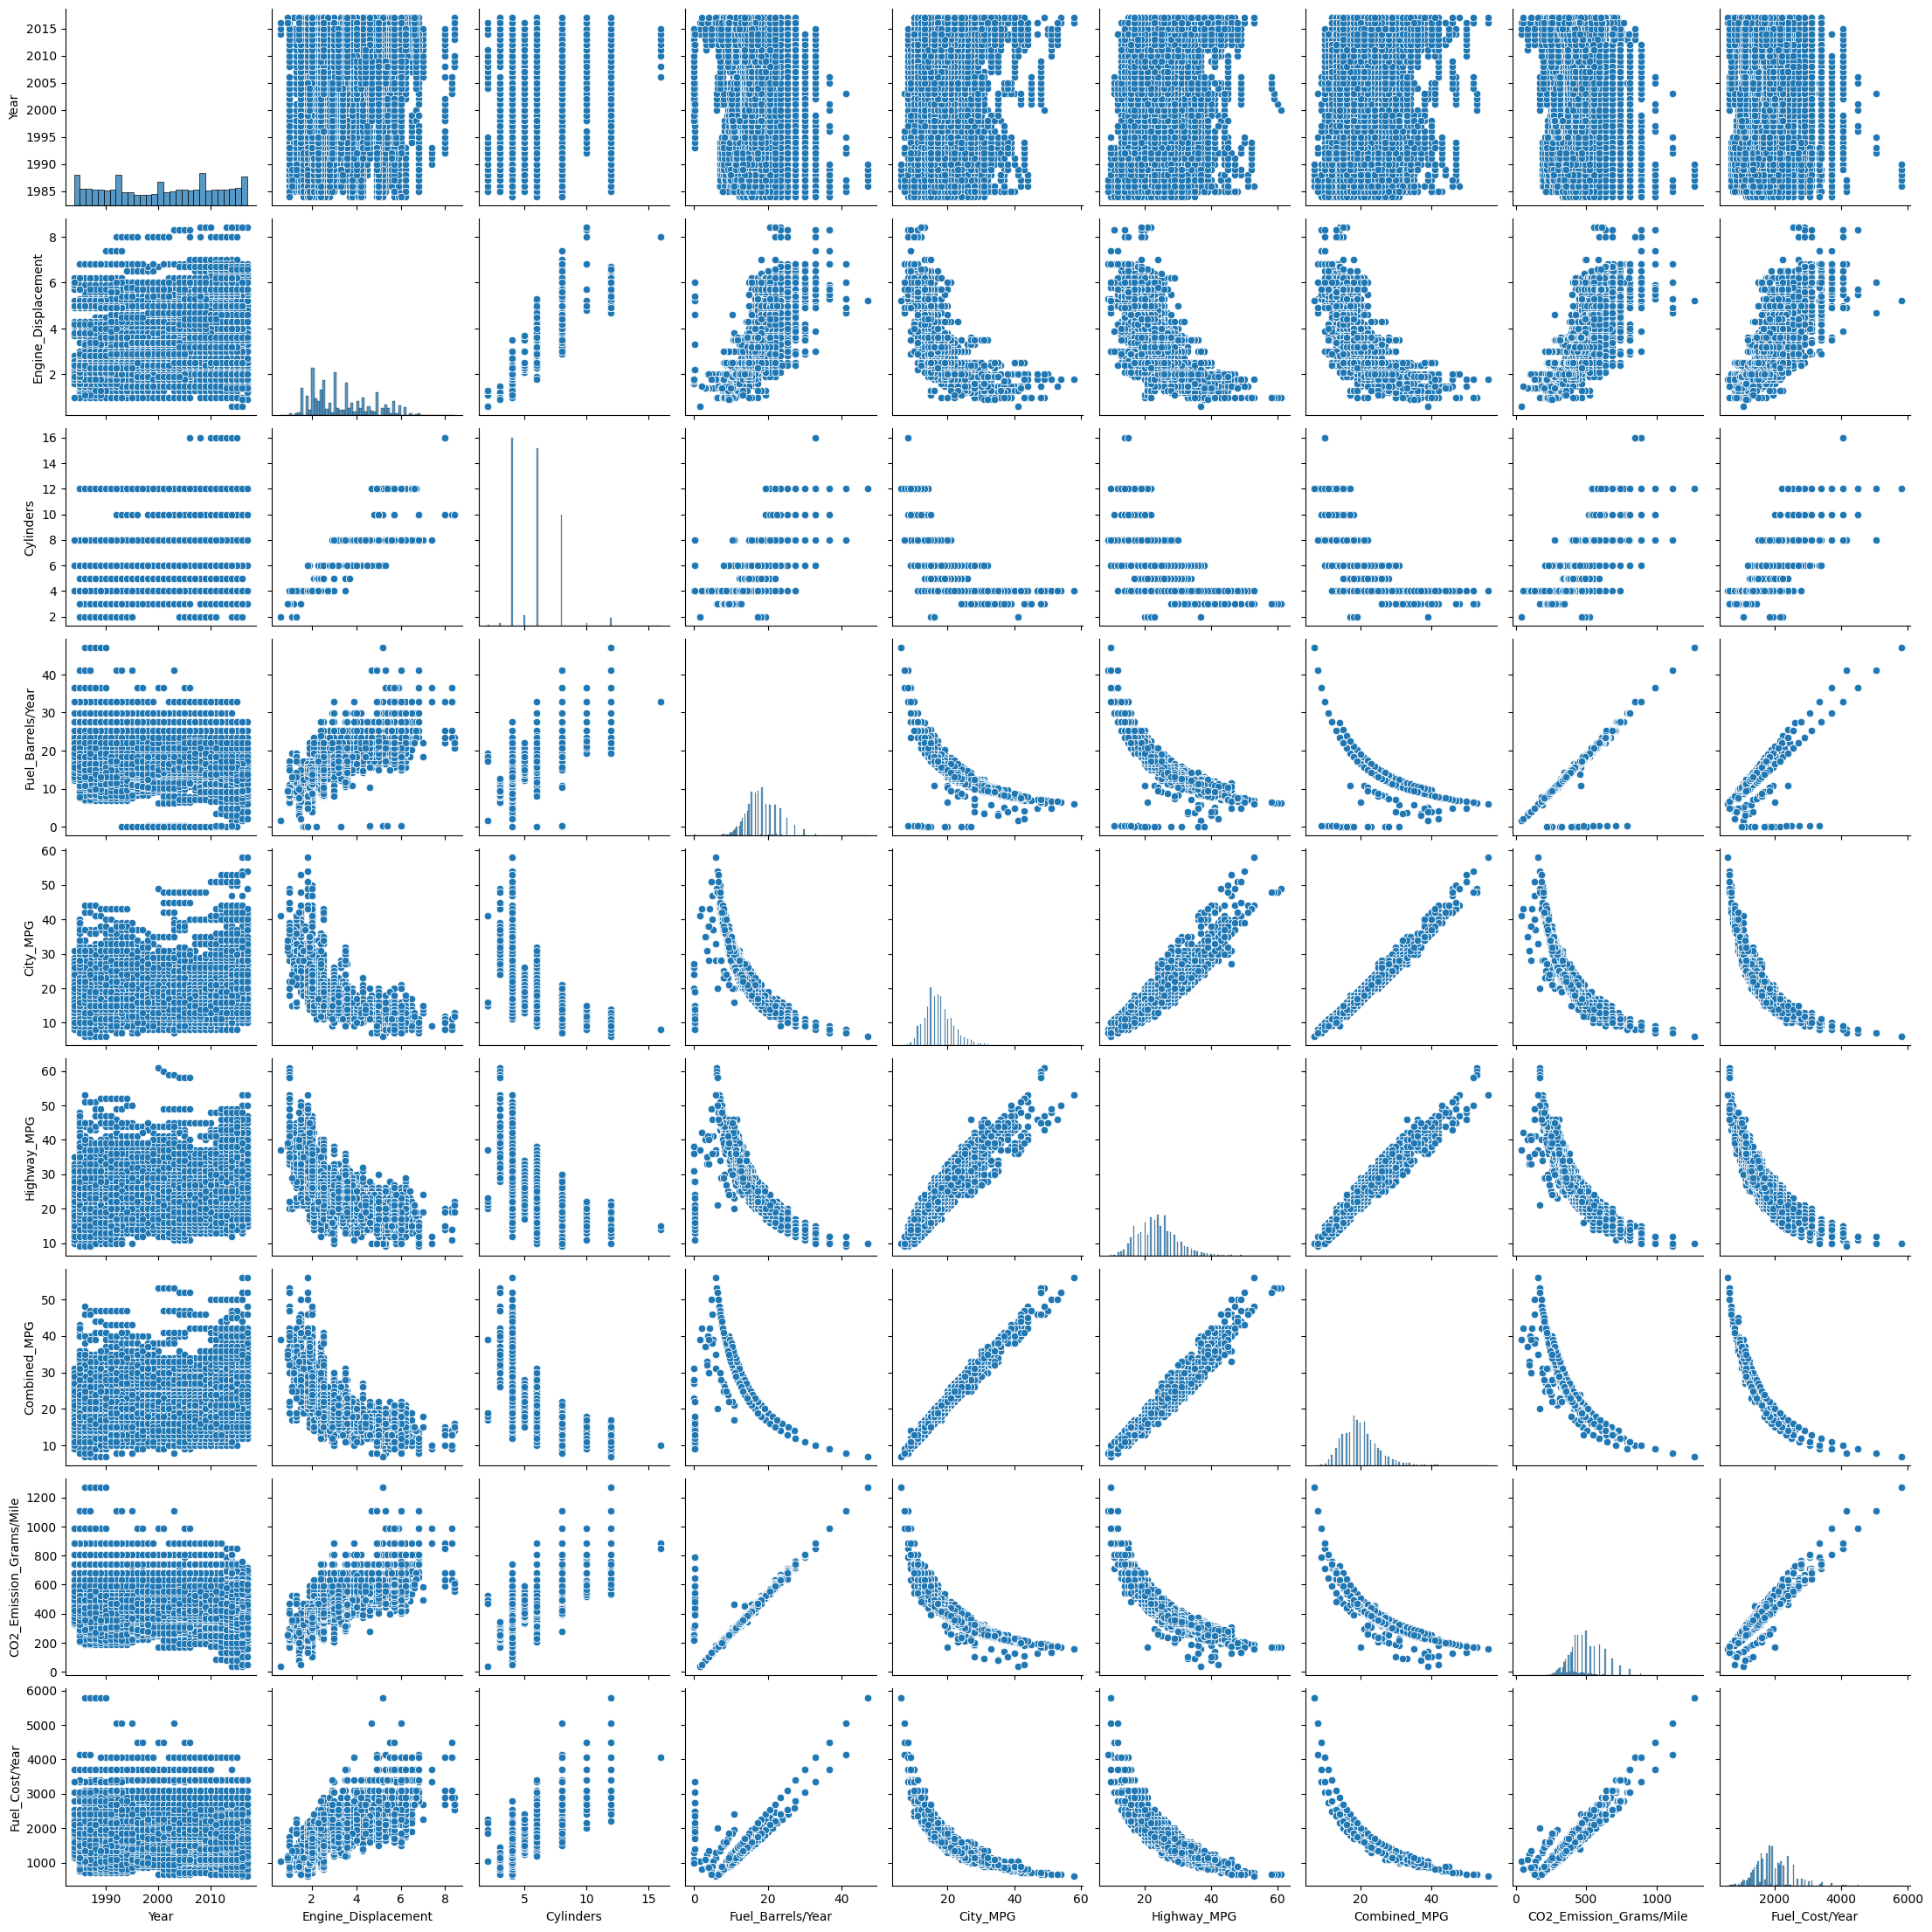

In [35]:
# Your response here. 
sns.pairplot(data);

#The most important variables that have best correlations with CO2 Emissions are Fuel Barreis/Year and Fuel Cost/Year

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [26]:
# Your response here. 
import statsmodels.formula.api as smf

In [43]:
data.columns

Index(['Make', 'Model', 'Year', 'Engine_Displacement', 'Cylinders',
       'Transmission', 'Drivetrain', 'Vehicle_Class', 'Fuel_Type',
       'Fuel_Barrels_Year', 'City_MPG', 'Highway_MPG', 'Combined_MPG',
       'CO2_Emission_Grams_Mile', 'Fuel_Cost_Year'],
      dtype='object')

In [44]:
results = smf.ols('CO2_Emission_Grams_Mile ~ Fuel_Barrels_Year + Fuel_Cost_Year', data=data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2_Emission_Grams_Mile   R-squared:                       0.977
Model:                                 OLS   Adj. R-squared:                  0.977
Method:                      Least Squares   F-statistic:                 7.708e+05
Date:                     Tue, 06 Jun 2023   Prob (F-statistic):               0.00
Time:                             20:44:08   Log-Likelihood:            -1.5487e+05
No. Observations:                    35952   AIC:                         3.098e+05
Df Residuals:                        35949   BIC:                         3.098e+05
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            10.0210      0.387     25.924      0.000       9.263      10.779
Fuel_Barrels_Year    22.1302      0.053    417.913      0.000      22.026      22.234
Fuel_Cost_Year        0.0399      0.000     85.609      0.000       0.039       0.041
==============================================================================
Omnibus:                    78651.444   Durbin-Watson:                   0.805
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        451445567.411
Skew:                          20.059   Prob(JB):                         0.00
Kurtosis:                     550.500   Cond. No.                     8.00e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [45]:
# Your response here. 
#This summary gives us the information that the incercept is 10.02 and with a coeficient of correlation of 22.13 against the Fuel Barrels a Year consumtion and a coeficient of correlation of 0.0399 aginst the fuel cost a year
#This regression model has a R2 of 0.977 which is pretty high and acuarate to predict the model behaviour

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [48]:
# Your code here. 
party_data = pd.DataFrame({'Invitations': [1,3,4,6,8,9,11,14], 'Atendees': [1,2,4,4,5,7,8,13]})
party_data

,Invitations,Atendees
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

<Axes: xlabel='Invitations', ylabel='Atendees'>

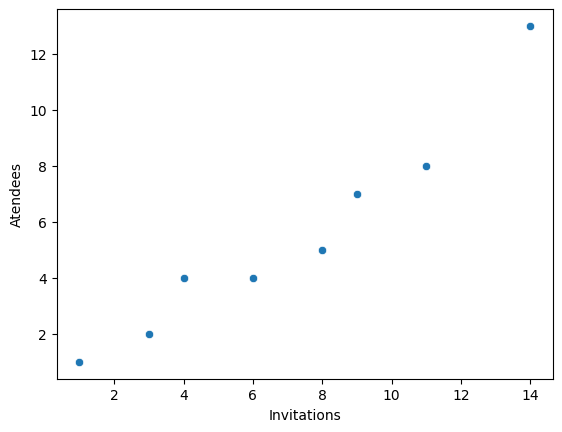

In [47]:
# Your code here.
sns.scatterplot(x= party_data.Invitations, y=party_data.Atendees)

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [50]:
# Your response here. 
lr_2 = LinearRegression()
lr_2.fit(
    X = party_data[['Invitations']],
    y = party_data.Atendees
)

LinearRegression()

In [52]:
def prediction_2 (x):
    m =  lr_2.coef_[0]
    n = lr_2.intercept_
     
    return m * x + n

In [55]:
party_data["prediction"] = party_data.Invitations.apply(prediction_2)
party_data

,Invitations,Atendees,prediction
0,1,1,0.409091
1,3,2,2.106061
2,4,4,2.954545
3,6,4,4.651515
4,8,5,6.348485
5,9,7,7.196970
6,11,8,8.893939
7,14,13,11.439394


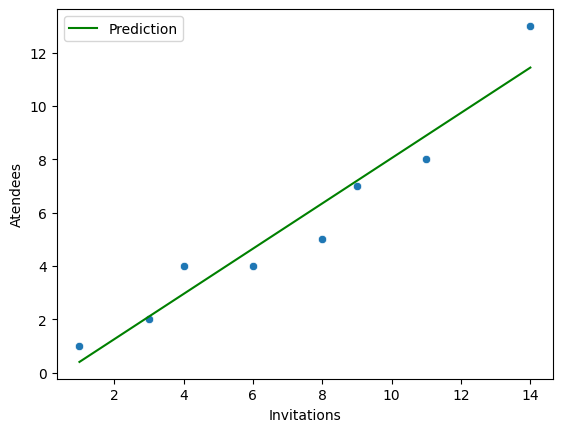

In [56]:
sns.scatterplot(x= party_data.Invitations, y=party_data.Atendees)
plt.plot(party_data.Invitations, party_data.prediction, label="Prediction", c="g")
plt.legend();

In [51]:
results = smf.ols('Invitations ~ Atendees', data=party_data).fit()
results.summary()

C:\Users\maria\miniconda3\envs\ironhack\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Invitations   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           0.000102
Time:                        20:59:10   Log-Likelihood:                -11.831
No. Observations:                   8   AIC:                             27.66
Df Residuals:                       6   BIC:                             27.82
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9608      0.796      1.207      0.273      -0.987       2.909
Atendees       1.0980      0.121      9.045      0.000       0.801       1.395
==============================================================================
Omnibus:                        1.930   Durbin-Watson:                   1.719
Prob(Omnibus):                  0.381   Jarque-Bera (JB):                0.742
Skew:                           0.048   Prob(JB):                        0.690
Kurtosis:                       1.511   Cond. No.                         12.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [57]:
# Your response here. 
#The last point could be an outlier and potentially by removing it, we could have a better approximation of the prediction.

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [59]:
# Your response here.
sub_df = party_data[:-1]

In [60]:
results = smf.ols('Invitations ~ Atendees', data=sub_df).fit()
results.summary()

C:\Users\maria\miniconda3\envs\ironhack\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Invitations   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     83.31
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           0.000264
Time:                        21:04:09   Log-Likelihood:                -8.2295
No. Observations:                   7   AIC:                             20.46
Df Residuals:                       5   BIC:                             20.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1061      0.755     -0.140      0.894      -2.048       1.835
Atendees       1.3788      0.151      9.127      0.000       0.990       1.767
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.634
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.200
Skew:                          -0.282   Prob(JB):                        0.905
Kurtosis:                       2.394   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
#By removing this last row (7) we can see that R2 increased giving us a better performance of this new sub-data frame model.